<a href="https://colab.research.google.com/github/rucha0209/Chemicals-in-cosmetics/blob/main/Chemical_in_Cosmetics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chemicals in Cosmetics

First we have remove duplicates in this dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_original = pd.read_csv('chemicals-in-cosmetics-.csv')
df = df_original.drop_duplicates()
print('The original database shape:', df_original.shape)
print('Database without duplicates:', df.shape)

The original database shape: (114300, 22)
Database without duplicates: (114046, 22)


In [ ]:
df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


## Investigating chemical counts

In [ ]:
df['ChemicalName'].value_counts().size

123

Overall there are 123 different chemicals that are reported.

Based on the description, each entry in column 'ChemicalCount' is the total number of current chemicals reported for a product. This number does not include chemicals that have been removed from a product.

In [ ]:
df['ChemicalCount'].describe()

count    114046.000000
mean          1.287384
std           0.634739
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: ChemicalCount, dtype: float64

In average, products contain at least one chemical. You can see there are products with 0 chemicals, and there are products with 9 reported chemicals.

For 'ChemicalCount'=0.

In [ ]:
df.loc[df.ChemicalCount==0].head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
31,24,White Premium Lotion Soap,NaN,NaN,181,"GOJO Industries, Inc.",GOJO�,74,Personal Care Products,170,...,68603-42-9,26,Cocamide diethanolamine,07/23/2009,02/07/2012,NaN,07/23/2009,02/07/2012,12/30/2010,0
497,333,Gentle Cleanser,NaN,NaN,71,"Sunrider Manufacturing, L.P.",Kandesn,6,Bath Products,159,...,68603-42-9,350,Cocamide diethanolamine,09/02/2009,09/16/2013,NaN,09/02/2009,09/16/2013,11/23/2009,0
498,334,Cleansing Foam,NaN,NaN,71,"Sunrider Manufacturing, L.P.",Kandesn,90,Skin Care Products,93,...,68603-42-9,351,Cocamide diethanolamine,09/02/2009,09/16/2013,NaN,09/02/2009,09/03/2009,09/02/2009,0
499,334,Cleansing Foam,NaN,NaN,71,"Sunrider Manufacturing, L.P.",Kandesn,90,Skin Care Products,93,...,68603-42-9,412,Cocamide diethanolamine,09/02/2009,09/16/2013,NaN,09/03/2009,12/05/2013,09/02/2009,0
500,334,Cleansing Foam,NaN,NaN,71,"Sunrider Manufacturing, L.P.",Kandesn,90,Skin Care Products,93,...,NaN,453,"Retinol/retinyl esters, when in daily dosages ...",09/02/2009,09/16/2013,NaN,09/03/2009,12/05/2013,12/05/2103,0


The number of chemicals being equal to zero suggests that the chemicals were removed from the product (reported in 'ChemicalDateRemoved'). This can be verified by checking if there are NaN values in this column.

In [ ]:
# when the result is False, there are no NaN values
df.loc[df.ChemicalCount==0]['ChemicalDateRemoved'].isnull().max()

False

In this we will focus on products that have reported at least one chemical and that are still in use (not discontinued).

In [ ]:
df_n0 = df.loc[(df.ChemicalCount>0) & (df['DiscontinuedDate'].isna())]

The maximum number of chemicals that is reported in a product is 9. We can find these products:

In [ ]:
df_n0.loc[df.ChemicalCount==9]

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
60819,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,123-91-1,33796,"1,4-Dioxane",02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60820,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,79-06-1,33797,Acrylamide,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60821,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,NaN,33798,Arsenic (inorganic arsenic compounds),02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60822,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,79-43-6,33799,Dichloroacetic acid,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60823,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,75-21-8,33800,Ethylene oxide,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60824,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,50-00-0,33801,Formaldehyde (gas),02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60825,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,7439-92-1,33802,Lead,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60826,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,NaN,33803,Cocamide diethanolamine (DEA),02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60827,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,107-21-1,33804,Ethylene glycol,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9


It turns out it is only one product, where each chemical is separately reported.

A bar chart showing the number of products per number of chemicals. In counting the number of products, different color, scent and/or flavor of the product are neglected.
In here, Professional Eyeshadow Base' can be beige or bright, but it is counted only once with the identification number 'CDPHId'=26

In [ ]:
df_n0.loc[df['CDPHId']==26]

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
32,26,Professional Eyeshadow Base,337.0,Beige,27,"CHANEL, INC",CHANEL,44,Makeup Products (non-permanent),48,...,13463-67-7,27,Titanium dioxide,08/10/2009,12/30/2010,NaN,08/10/2009,08/10/2009,NaN,1
33,26,Professional Eyeshadow Base,338.0,Bright,27,"CHANEL, INC",CHANEL,44,Makeup Products (non-permanent),48,...,13463-67-7,27,Titanium dioxide,08/10/2009,12/30/2010,NaN,08/10/2009,08/10/2009,NaN,1


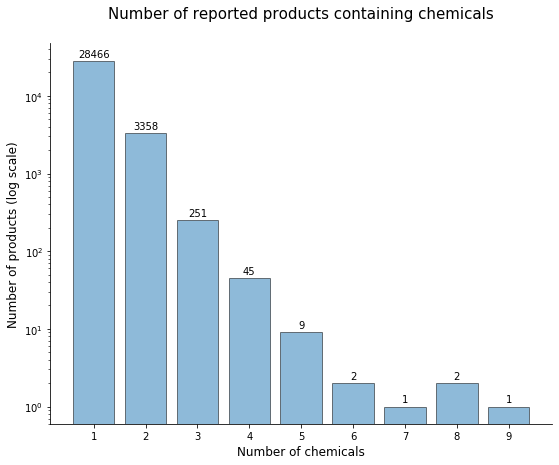

In [ ]:
data = df_n0.groupby(['ChemicalCount']).nunique()['CDPHId']

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
ax.bar(data.index, data.values, log=True, align='center', alpha=0.5, edgecolor='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(1,10))

for x,y in zip(data.index,data.values):
    plt.annotate(y, (x,y), textcoords="offset points", xytext=(0,4), ha='center') 

ax.set_title('Number of reported products containing chemicals', fontsize=15)
ax.title.set_position([.5, 1.05])
ax.set_xlabel('Number of chemicals', fontsize=12)
ax.set_ylabel('Number of products (log scale)', fontsize=12)

plt.show()

## Chemicals in baby products

Baby products represent one of the primary categories in this dataset. 

In [ ]:
baby_prod = df_n0.loc[df_n0['PrimaryCategory']=='Baby Products']
baby_prod.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
14178,3195,Baby Don't Cry Shampoo,22468.0,Fragrance/parfum,174,John Paul Mitchell Systems,John Paul Mitchell Systems,1,Baby Products,3,...,100-42-5,5734,Styrene,10/09/2009,12/30/2010,NaN,10/09/2009,10/09/2009,NaN,1
19139,4654,Harmon Zinc Oxide Ointment 2oz,NaN,NaN,266,Harmon Stores Inc.,Harmon Face Values,1,Baby Products,4,...,7440-43-10,8298,Cadmium and cadmium compounds,10/14/2009,10/14/2009,NaN,10/14/2009,10/14/2009,NaN,2
19140,4654,Harmon Zinc Oxide Ointment 2oz,NaN,NaN,266,Harmon Stores Inc.,Harmon Face Values,1,Baby Products,4,...,7439-92-1,8299,Lead,10/14/2009,10/14/2009,NaN,10/14/2009,10/14/2009,NaN,2
20078,5092,Balmex Multi-Purpose Healing Ointment,NaN,NaN,60,"Chattem, Inc.",Balmex,1,Baby Products,160,...,NaN,8860,"Retinol/retinyl esters, when in daily dosages ...",10/15/2009,08/04/2015,NaN,10/15/2009,08/04/2015,NaN,1
20083,5096,Balmex Prevention Baby Powder,NaN,NaN,60,"Chattem, Inc.",Balmex,1,Baby Products,4,...,NaN,8865,"Retinol/retinyl esters, when in daily dosages ...",10/15/2009,08/04/2015,NaN,10/15/2009,08/04/2015,NaN,1


We will find all chemicals present in baby products (listed and in a graph).

In [ ]:
baby_prod_chem = baby_prod['ChemicalName'].value_counts()
print(baby_prod_chem)

Titanium dioxide                                                                                       16
Cocamide DEA                                                                                            5
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     3
Retinyl palmitate                                                                                       3
Cocamide diethanolamine                                                                                 2
Lead                                                                                                    1
Butylated hydroxyanisole                                                                                1
Acetaldehyde                                                                                            1
Talc                                                                                                    1
Formaldehyde (gas)                            

The long name 'Retinol/retinyl esters, when in daily dosages ...' will be replaced with 'Retinol'. 

In [ ]:
long_text = baby_prod_chem.index[2]
print('Old chemical name: ', long_text)
print()
baby_prod_chem.rename({baby_prod_chem.index[2]: 'Retinol *'}, inplace=True)
print('New chemical name: ', baby_prod_chem.index[2])

Old chemical name:  Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.

New chemical name:  Retinol *


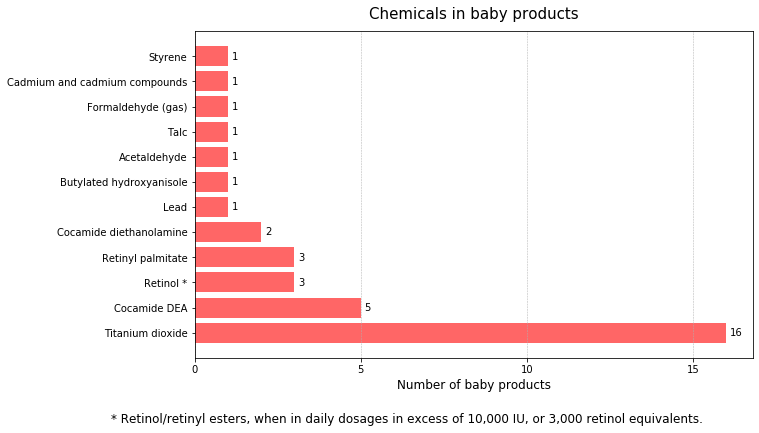

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.barh(baby_prod_chem.index, baby_prod_chem.values, color='red', alpha=0.6)

ax.xaxis.grid(linestyle='--', linewidth=0.5)

for x,y in zip(baby_prod_chem.values,baby_prod_chem.index):
    ax.annotate(x, (x,y), textcoords="offset points", xytext=(4,0), va='center') 

ax.set_title('Chemicals in baby products', fontsize=15)
ax.title.set_position([0.5,1.02])
ax.set_xlabel('Number of baby products', fontsize=12)
ax.set_xticks(np.arange(0,18,5))
plt.text(-0.15,-0.2, "* "+long_text, size=12, transform=ax.transAxes)

plt.show()

List of all baby product names, containing at least one chemical, sorted by subcategory.

In [ ]:
reported_baby_prod = baby_prod[['ProductName', 'CompanyName', 'SubCategory']].sort_values('SubCategory')
reported_baby_prod.columns=['Baby product', 'Company', 'Type of product']
reported_baby_prod.style.hide_index()

Baby product,Company,Type of product
Baby Don't Cry Shampoo,John Paul Mitchell Systems,Baby Shampoos
"Baby Dream Bath, Baby Wash, Baby Shampoo",Delon Laboratories (1990) Inc,Baby Shampoos
Johnson's Baby Creamy Oil Aloe & Vitamin E,Johnson & Johnson Consumer Companies,Baby Skin Care
Johnson's Baby Bar,Johnson & Johnson Consumer Companies,Baby Skin Care
Vitamin C Serum,"Perfect Angel Cosmetics & Health Co., Limited",Baby Skin Care
Vitamin E Baby Oil Cream,"Vi-Jon, Inc",Baby Skin Care
Burt's Bees Baby Nourishing Mineral Sunscreen SPF 30,Burt's Bees Inc.,Baby Skin Care
Pure & Free Baby Stick SPF60,Johnson & Johnson Consumer Companies,Baby Skin Care
Baby Natural Protection Stick SPF50+,Johnson & Johnson Consumer Companies,Baby Skin Care
Pure & Free Baby Faces Ultra Gentle SPF45,Johnson & Johnson Consumer Companies,Baby Skin Care


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df_n0, nGraphShown, nGraphPerRow):
    nunique = df_n0.nunique()
    df_n0 = df_n0[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df_n0.shape
    columnNames = list(df_n0)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df_n0.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


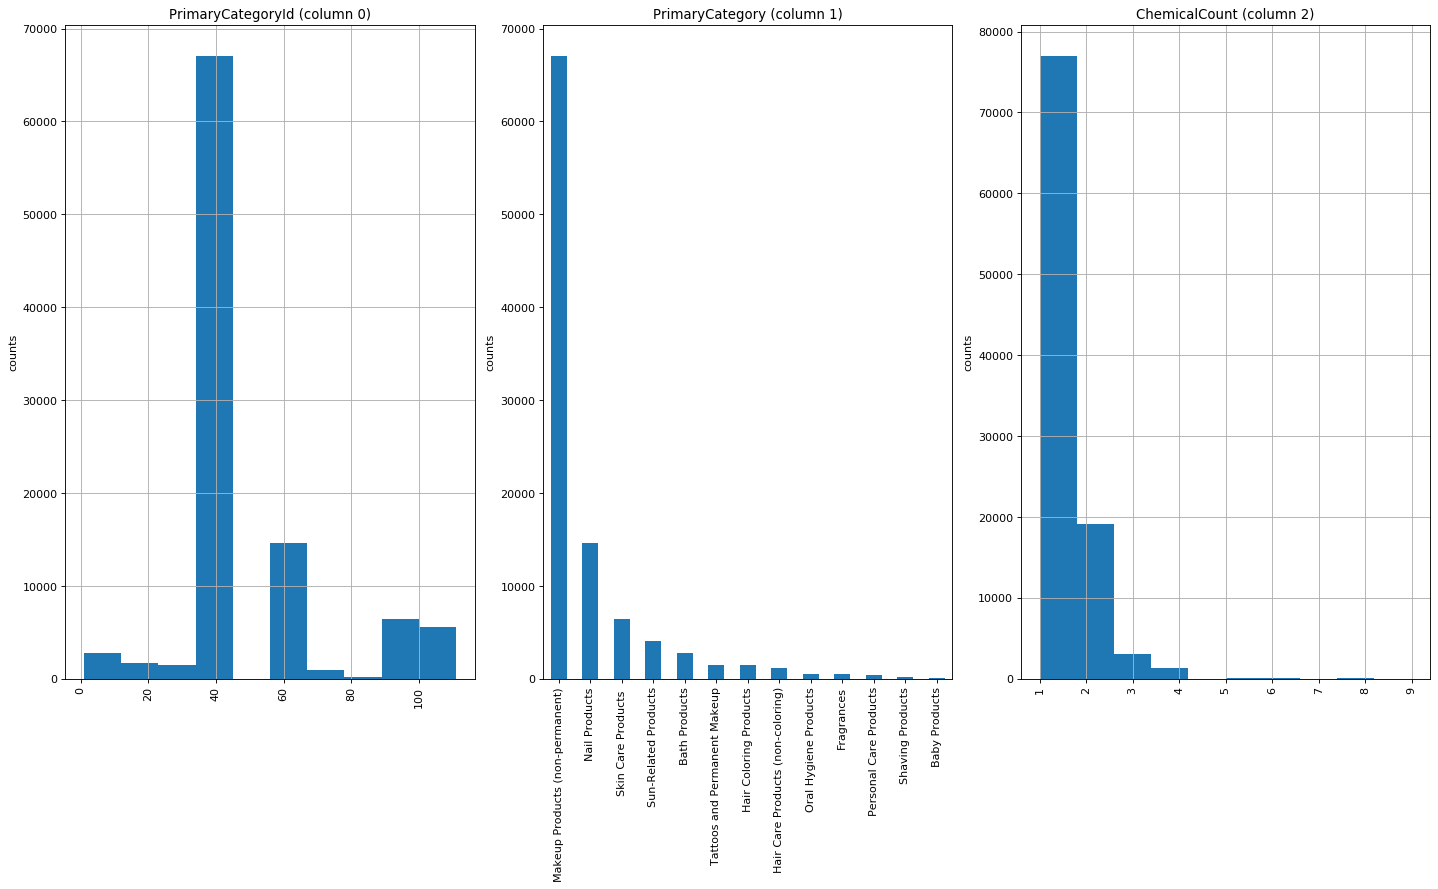

In [ ]:
plotPerColumnDistribution(df_n0, 10, 5)

In [ ]:
import seaborn as sns

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df_n0, graphWidth):
    #filename = df_n0.dataframename
    df = df_n0.dropna('columns') # drop columns with NaN
    df = df_n0[[col for col in df_n0 if df_n0[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df_n0.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df_n0.shape[1]}) is less than 2')
        return
    corr = df_n0.corr()
    #sns.heatmap(df_n0.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
   # plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    


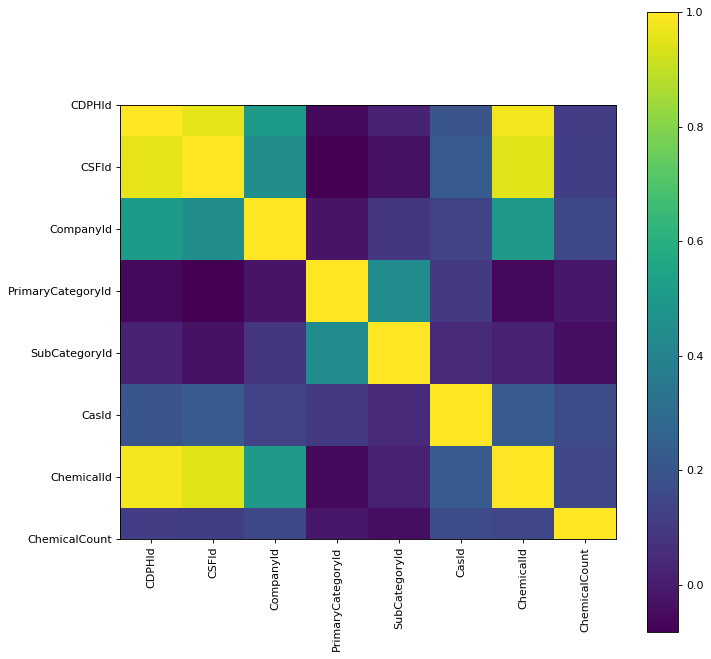

In [ ]:
plotCorrelationMatrix(df_n0, 10)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df_n0, plotSize, textSize):
    df = df_n0.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df_n0.dropna('columns')
    df = df_n0[[col for col in df_n0 if df_n0[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df_n0)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df_n0[columnNames]
    ax = pd.plotting.scatter_matrix(df_n0, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df_n0.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

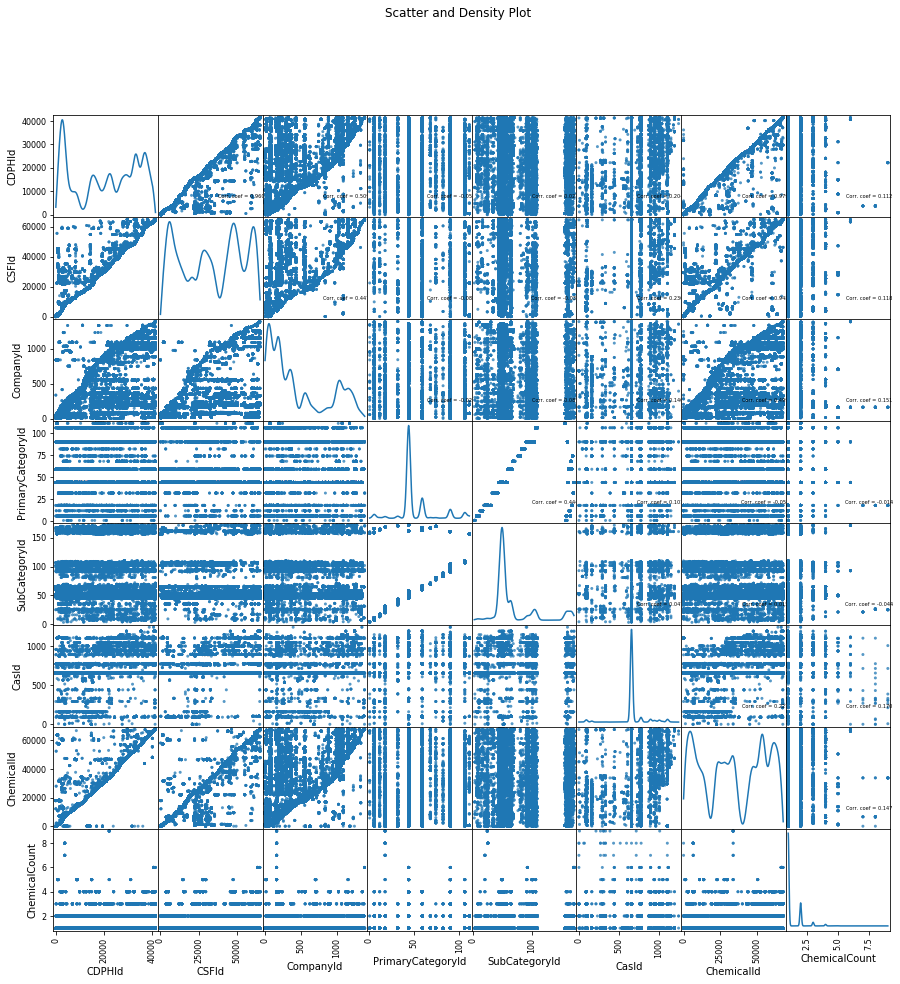

In [ ]:
plotScatterMatrix(df_n0, 15,5)